In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/6-Site_SD-PV2-DB-SD-3A.csv')

In [70]:
energy_df = data[['timestamp','Active_Energy_Delivered_Received']]


In [71]:
energy_df

,timestamp,Active_Energy_Delivered_Received
0,2016-04-01 23:45:00,3807.158691
1,2016-04-01 23:50:00,3807.156738
2,2016-04-01 23:55:00,3807.155029
3,2016-04-02 00:00:00,3807.153320
4,2016-04-02 00:05:00,3807.151367
...,...,...
936228,2025-04-04 17:30:00,690111.250000
936229,2025-04-04 17:35:00,690112.000000
936230,2025-04-04 17:40:00,690112.625000
936231,2025-04-04 17:45:00,690113.187500


In [72]:
energy_df['Active_Energy_Delivered_Received_shift'] = energy_df['Active_Energy_Delivered_Received'].shift(-1)

/var/folders/9z/jhl761ys4zxdmlymdmcfs3jm0000gn/T/ipykernel_28727/3450890530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Active_Energy_Delivered_Received_shift'] = energy_df['Active_Energy_Delivered_Received'].shift(-1)


In [73]:
energy_df

,timestamp,Active_Energy_Delivered_Received,Active_Energy_Delivered_Received_shift
0,2016-04-01 23:45:00,3807.158691,3807.156738
1,2016-04-01 23:50:00,3807.156738,3807.155029
2,2016-04-01 23:55:00,3807.155029,3807.153320
3,2016-04-02 00:00:00,3807.153320,3807.151367
4,2016-04-02 00:05:00,3807.151367,3807.149658
...,...,...,...
936228,2025-04-04 17:30:00,690111.250000,690112.000000
936229,2025-04-04 17:35:00,690112.000000,690112.625000
936230,2025-04-04 17:40:00,690112.625000,690113.187500
936231,2025-04-04 17:45:00,690113.187500,690113.687500


In [74]:
energy_df['solar_energy'] = energy_df['Active_Energy_Delivered_Received_shift'] - energy_df['Active_Energy_Delivered_Received']

/var/folders/9z/jhl761ys4zxdmlymdmcfs3jm0000gn/T/ipykernel_28727/3310285961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['solar_energy'] = energy_df['Active_Energy_Delivered_Received_shift'] - energy_df['Active_Energy_Delivered_Received']


In [75]:
energy_df = energy_df.drop('Active_Energy_Delivered_Received',axis=1)
energy_df = energy_df.drop('Active_Energy_Delivered_Received_shift',axis=1)

In [76]:
energy_df = energy_df.dropna()

In [77]:
energy_df.set_index('timestamp',inplace=True)

In [78]:
energy_df.index = pd.to_datetime(energy_df.index)

In [79]:
energy_df = energy_df.resample('h').sum()

In [83]:
energy_df

,solar_energy
timestamp,
2016-04-01 23:00:00,0.0000
2016-04-02 00:00:00,0.0000
2016-04-02 01:00:00,0.0000
2016-04-02 02:00:00,0.0000
2016-04-02 03:00:00,0.0000
...,...
2025-04-04 13:00:00,36.2500
2025-04-04 14:00:00,32.9375
2025-04-04 15:00:00,27.3125


In [82]:
energy_df['solar_energy'] = energy_df['solar_energy'].apply(lambda x: max(x, 0))

In [86]:
energy_df = energy_df[(energy_df.index >= '2022-04-01 00:00:00') & (energy_df.index <= '2025-04-01 23:00:00')]

In [88]:
energy_df

,solar_energy
timestamp,
2022-04-01 00:00:00,0.0
2022-04-01 01:00:00,0.0
2022-04-01 02:00:00,0.0
2022-04-01 03:00:00,0.0
2022-04-01 04:00:00,0.0
...,...
2025-04-01 19:00:00,0.0
2025-04-01 20:00:00,0.0
2025-04-01 21:00:00,0.0


In [89]:
energy_df.to_excel('solar_generation.xlsx')

In [90]:
data.head(3)

,timestamp,Current_Phase_Average_Mean,Active_Energy_Delivered_Received,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Global_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Max_Wind_Speed,Air_Pressure,Hail_Accumulation,Pyranometer_1,Temperature_Probe_1,Temperature_Probe_2
0,2016-04-01 23:45:00,0.295540,3807.158691,-0.021497,1.386667,21.733334,-3.157586,228.800003,0.0,2.0,957.099976,0.0,99999.898438,37.152992,37.188801
1,2016-04-01 23:50:00,0.295430,3807.156738,-0.021598,1.096667,21.523333,-3.060027,249.133331,0.0,2.0,957.099976,0.0,99999.898438,92.096169,37.268780
2,2016-04-01 23:55:00,0.295513,3807.155029,-0.021557,0.420000,21.606667,-3.305817,151.133331,0.0,1.4,957.099976,0.0,99999.898438,55.639309,37.327877


In [91]:
weather_df = data[['timestamp','Wind_Speed','Weather_Temperature_Celsius','Global_Horizontal_Radiation','Wind_Direction','Weather_Daily_Rainfall','Air_Pressure']]

In [92]:
weather_df

,timestamp,Wind_Speed,Weather_Temperature_Celsius,Global_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Air_Pressure
0,2016-04-01 23:45:00,1.386667,21.733334,-3.157586,228.800003,0.0,957.099976
1,2016-04-01 23:50:00,1.096667,21.523333,-3.060027,249.133331,0.0,957.099976
2,2016-04-01 23:55:00,0.420000,21.606667,-3.305817,151.133331,0.0,957.099976
3,2016-04-02 00:00:00,0.506667,21.753334,-3.252611,233.600006,0.0,957.079956
4,2016-04-02 00:05:00,0.240000,21.673334,-3.593779,283.233337,0.0,957.000000
...,...,...,...,...,...,...,...
936228,2025-04-04 17:30:00,2.416667,27.703335,292.465576,146.966660,0.0,957.099976
936229,2025-04-04 17:35:00,2.423333,27.513334,270.042877,151.533340,0.0,957.140015
936230,2025-04-04 17:40:00,1.850000,27.443333,245.868515,136.300003,0.0,957.190002
936231,2025-04-04 17:45:00,1.383333,27.563334,221.638123,125.500000,0.0,957.196655


In [93]:
weather_df.set_index('timestamp',inplace=True)

In [94]:
weather_df.index = pd.to_datetime(weather_df.index)

In [95]:
weather_df = weather_df.resample('h').mean()

In [96]:
weather_df =weather_df[(weather_df.index >= '2022-04-01 00:00:00') & (weather_df.index <= '2025-04-01 23:00:00')]

In [97]:
weather_df

,Wind_Speed,Weather_Temperature_Celsius,Global_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Air_Pressure
timestamp,,,,,,
2022-04-01 00:00:00,2.101667,21.649444,-3.850570,157.708332,0.0,960.305557
2022-04-01 01:00:00,1.596944,20.151666,-3.966168,155.272222,0.0,960.181391
2022-04-01 02:00:00,2.103056,18.930278,-3.505978,145.388887,0.0,960.034714
2022-04-01 03:00:00,1.929444,18.111111,-3.632264,146.205555,0.0,959.567485
2022-04-01 04:00:00,1.600278,16.361389,-3.840125,147.111112,0.0,959.424464
...,...,...,...,...,...,...
2025-04-01 19:00:00,2.237222,20.042500,-1.167980,151.566667,0.0,951.325551
2025-04-01 20:00:00,1.560000,18.963636,-3.151029,163.284848,0.0,951.960305
2025-04-01 21:00:00,1.197778,17.797500,-3.332040,159.502777,0.0,952.487503


In [98]:
weather_df.to_excel('weather_df.xlsx')

In [99]:
solarGenWithWeather = pd.concat([energy_df,weather_df],axis=1)

In [100]:
solarGenWithWeather.to_excel('solarGenerationDataWithWeatherData.xlsx')

Concatanate the UOM weather data

In [110]:
df1 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/University of Moratuwa, S... 2022-04-01 to 2022-05-10.csv')
df2 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/University of Moratuwa, S... 2022-05-11 to 2022-06-20.csv')
df3 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/University of Moratuwa, S... 2022-06-21 to 2022-07-31.csv')
df4 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/university of Moratuwa, S... 2022-08-01 to 2022-09-10.csv')
df5 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/University of Moratuwa, S... 2022-09-11 to 2022-10-21.csv')
df6 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/University of Moratuwa, S... 2022-10-22 to 2022-11-30.csv')
df7 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/University of Moratuwa, S... 2022-12-01 to 2023-01-10.csv')
df8 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/University of Moratuwa, S... 2023-01-11 to 2023-02-20.csv')
df9 = pd.read_csv('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/WeatherDataUOM/University of Moratuwa, S... 2023-02-21 to 2025-04-01.csv')


In [111]:
weatherData = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=0)

In [112]:
weatherData


,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"University of Moratuwa, Sri lanka",2022-04-01T00:00:00,26.1,26.1,24.1,88.76,0.0,0,NaN,0,...,1010.0,30.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,43450099999
1,"University of Moratuwa, Sri lanka",2022-04-01T01:00:00,26.1,26.1,23.1,83.57,0.0,0,NaN,0,...,1010.0,30.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,43450099999
2,"University of Moratuwa, Sri lanka",2022-04-01T02:00:00,25.7,25.7,23.3,86.52,0.0,0,NaN,0,...,1009.1,61.9,18.1,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"43450099999,43467099999,43486099999,43466099999"
3,"University of Moratuwa, Sri lanka",2022-04-01T03:00:00,26.1,26.1,24.1,88.76,0.0,0,NaN,0,...,1009.0,50.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,43450099999
4,"University of Moratuwa, Sri lanka",2022-04-01T04:00:00,26.1,26.1,24.1,88.76,0.0,0,NaN,0,...,1008.0,30.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,43450099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18499,"University of Moratuwa, Sri lanka",2025-04-01T19:00:00,29.6,33.5,22.8,67.09,0.0,0,NaN,0,...,1008.3,50.0,10.0,25.4,0.1,0,10.0,Partially cloudy,partly-cloudy-night,"43450099999,43486099999,43466099999"
18500,"University of Moratuwa, Sri lanka",2025-04-01T20:00:00,30.4,36.1,24.4,70.14,0.0,0,NaN,0,...,1009.3,88.4,12.9,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"43450099999,43467099999,43486099999,43466099999"
18501,"University of Moratuwa, Sri lanka",2025-04-01T21:00:00,29.5,33.3,22.8,67.45,0.0,0,NaN,0,...,1009.8,50.0,10.0,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"43450099999,43486099999,43466099999"
18502,"University of Moratuwa, Sri lanka",2025-04-01T22:00:00,29.0,32.8,23.1,70.49,0.0,0,NaN,0,...,1009.9,90.0,10.0,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"43450099999,43486099999,43466099999"


In [101]:
weatherData.to_excel('weatherDataUOM.xlsx')

In [115]:
energy_df = energy_df.reset_index()

In [2]:
df = pd.read_excel('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/solar_generation_UOM.xlsx')

In [5]:
df = df.drop('Unnamed: 2',axis=1)
df = df.drop('datetime',axis=1)
df = df.drop('name',axis=1)
df = df.drop('conditions',axis=1)
df = df.drop('icon',axis=1)
df = df.drop('stations',axis=1)

In [9]:
df = df.drop('preciptype',axis=1)
df = df.drop('snow',axis=1)


KeyError: "['snow'] not found in axis"

In [3]:
df

,timestamp,solar_energy,Unnamed: 2,name,datetime,temp,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,2022-04-01 00:00:00,0.0,0,"University of Moratuwa, Sri lanka",2022-04-01T00:00:00,26.1,26.1,24.1,88.76,0.0,...,1010.0,30.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,43450099999
1,2022-04-01 01:00:00,0.0,1,"University of Moratuwa, Sri lanka",2022-04-01T01:00:00,26.1,26.1,23.1,83.57,0.0,...,1010.0,30.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,43450099999
2,2022-04-01 02:00:00,0.0,2,"University of Moratuwa, Sri lanka",2022-04-01T02:00:00,25.7,25.7,23.3,86.52,0.0,...,1009.1,61.9,18.1,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"43450099999,43467099999,43486099999,43466099999"
3,2022-04-01 03:00:00,0.0,3,"University of Moratuwa, Sri lanka",2022-04-01T03:00:00,26.1,26.1,24.1,88.76,0.0,...,1009.0,50.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,43450099999
4,2022-04-01 04:00:00,0.0,4,"University of Moratuwa, Sri lanka",2022-04-01T04:00:00,26.1,26.1,24.1,88.76,0.0,...,1008.0,30.0,10.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,43450099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,2025-04-01 19:00:00,0.0,18499,"University of Moratuwa, Sri lanka",2025-04-01T19:00:00,29.6,33.5,22.8,67.09,0.0,...,1008.3,50.0,10.0,25.4,0.1,0,10.0,Partially cloudy,partly-cloudy-night,"43450099999,43486099999,43466099999"
26324,2025-04-01 20:00:00,0.0,18500,"University of Moratuwa, Sri lanka",2025-04-01T20:00:00,30.4,36.1,24.4,70.14,0.0,...,1009.3,88.4,12.9,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"43450099999,43467099999,43486099999,43466099999"
26325,2025-04-01 21:00:00,0.0,18501,"University of Moratuwa, Sri lanka",2025-04-01T21:00:00,29.5,33.3,22.8,67.45,0.0,...,1009.8,50.0,10.0,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"43450099999,43486099999,43466099999"
26326,2025-04-01 22:00:00,0.0,18502,"University of Moratuwa, Sri lanka",2025-04-01T22:00:00,29.0,32.8,23.1,70.49,0.0,...,1009.9,90.0,10.0,0.0,0.0,0,10.0,Partially cloudy,partly-cloudy-night,"43450099999,43486099999,43466099999"


Text(0.5, 1.0, 'Correlation Heatmap')

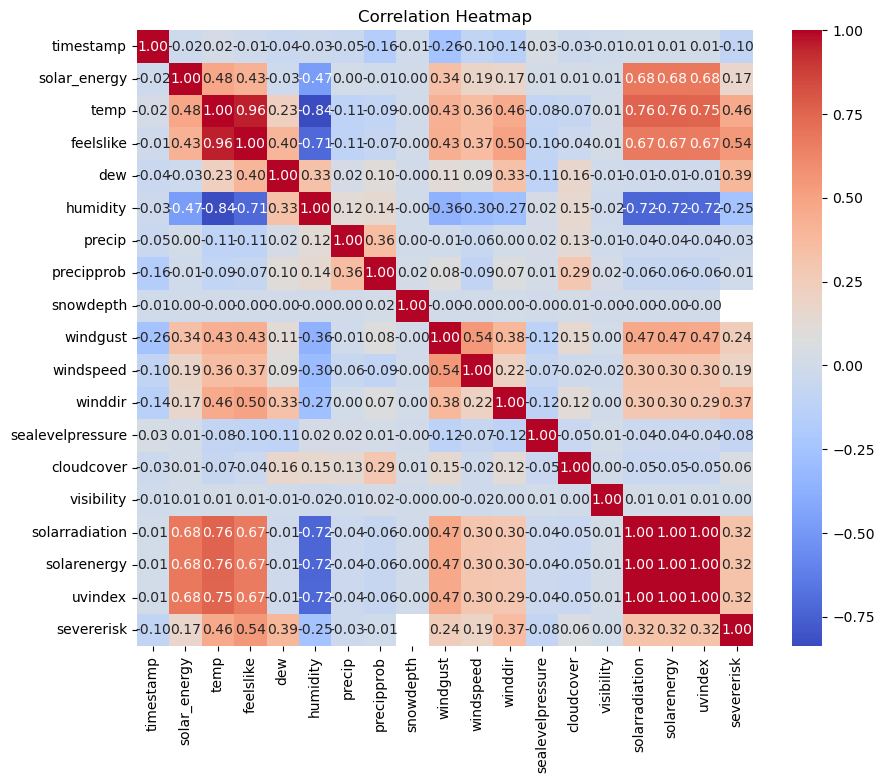

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")

In [4]:
df.columns

Index(['timestamp', 'solar_energy', 'Unnamed: 2', 'name', 'datetime', 'temp',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon',
       'stations'],
      dtype='object')

In [8]:
choosen_df = df[['timestamp','solar_energy','temp','humidity','windgust','cloudcover','visibility','solarradiation','conditions','solarenergy']]

In [9]:
choosen_df['conditions'].unique()

array(['Partially cloudy', 'Clear', 'Rain, Partially cloudy',
       'Rain, Overcast', 'Overcast', 'Rain'], dtype=object)

In [10]:
choosen_df.to_excel('filterdSolarGenerationUOM.xlsx')